# <center>CM3015 - Machine Learning Mid-Term Coursework</center>
### <center>Healthcare - Diabetes prediction Model</center>



## 1 Data Prep and Surface Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Load the dataset
data = pd.read_csv('Healthcare-Diabetes.csv')

data

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [3]:
# Check for missing values
print(data.isnull().sum())

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
# Checking if all columns are numeric
data.info()

# Separate features and target variable
X = data.drop(columns=['Id', 'Outcome'])  # Features
y = data['Outcome']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


## 2 kNN Algorithm and ROC Curve Visualisation

In [5]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN: {accuracy:.2f}")

Accuracy of kNN: 0.86


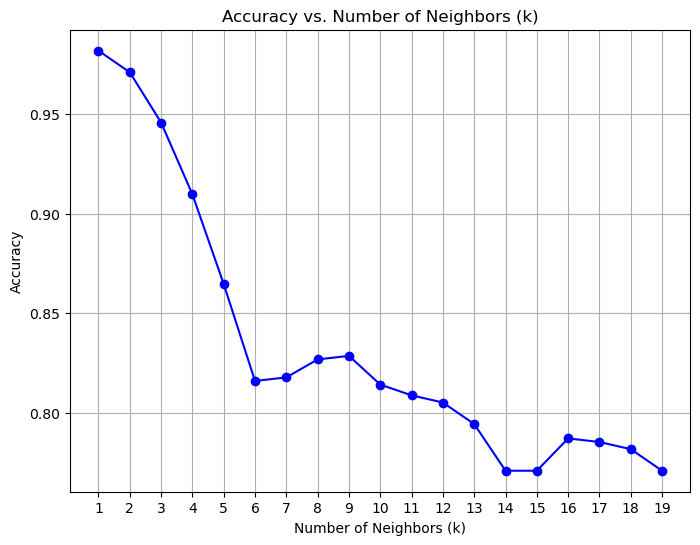

In [6]:
# Define a range of k values
k_values = range(1, 20)
accuracies = []

# Calculate accuracy for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracies.append(accuracy)

# Plotting accuracy vs. k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

## 3 Logistic Regression Visualisation

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise logistic regression classifier
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Fit the classifier to the training data
logistic_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_classifier.predict(X_test)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy of Logistic Regression: {accuracy_logistic:.2f}")

# Classification report
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))

Accuracy of Logistic Regression: 0.77
Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       367
           1       0.73      0.52      0.61       187

    accuracy                           0.77       554
   macro avg       0.76      0.71      0.73       554
weighted avg       0.77      0.77      0.76       554



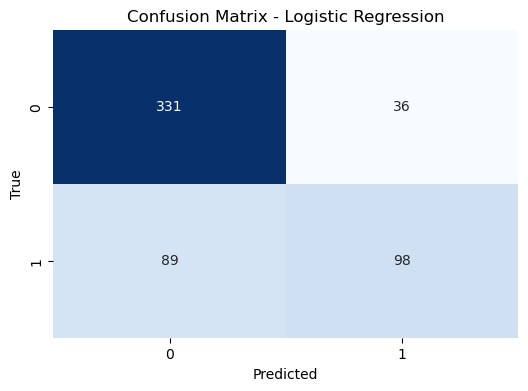

In [8]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

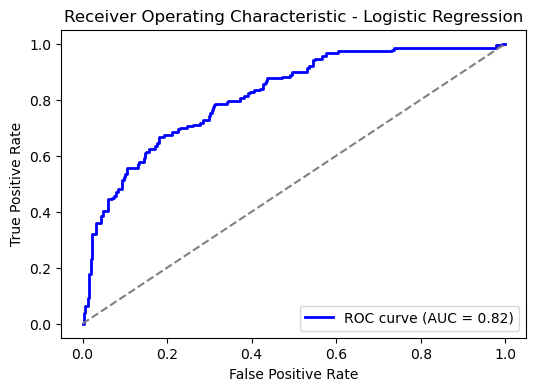

In [9]:
from sklearn.metrics import roc_curve, auc

# Probability calculation
y_probs_logistic = logistic_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs_logistic)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

## 4 Exploratory Data Analysis (EDA)

In [10]:
# Summary statistics
print(X.describe())

       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2768.000000  2768.000000    2768.000000    2768.000000  2768.000000   
mean      3.742775   121.102601      69.134393      20.824422    80.127890   
std       3.323801    32.036508      19.231438      16.059596   112.301933   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      62.000000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    37.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age  
count  2768.000000               2768.000000  2768.000000  
mean     32.137392                  0.471193    33.132225  
std       8.076127                  0.325669    11.777230  
min       0.000000                  0.078000    21.000000

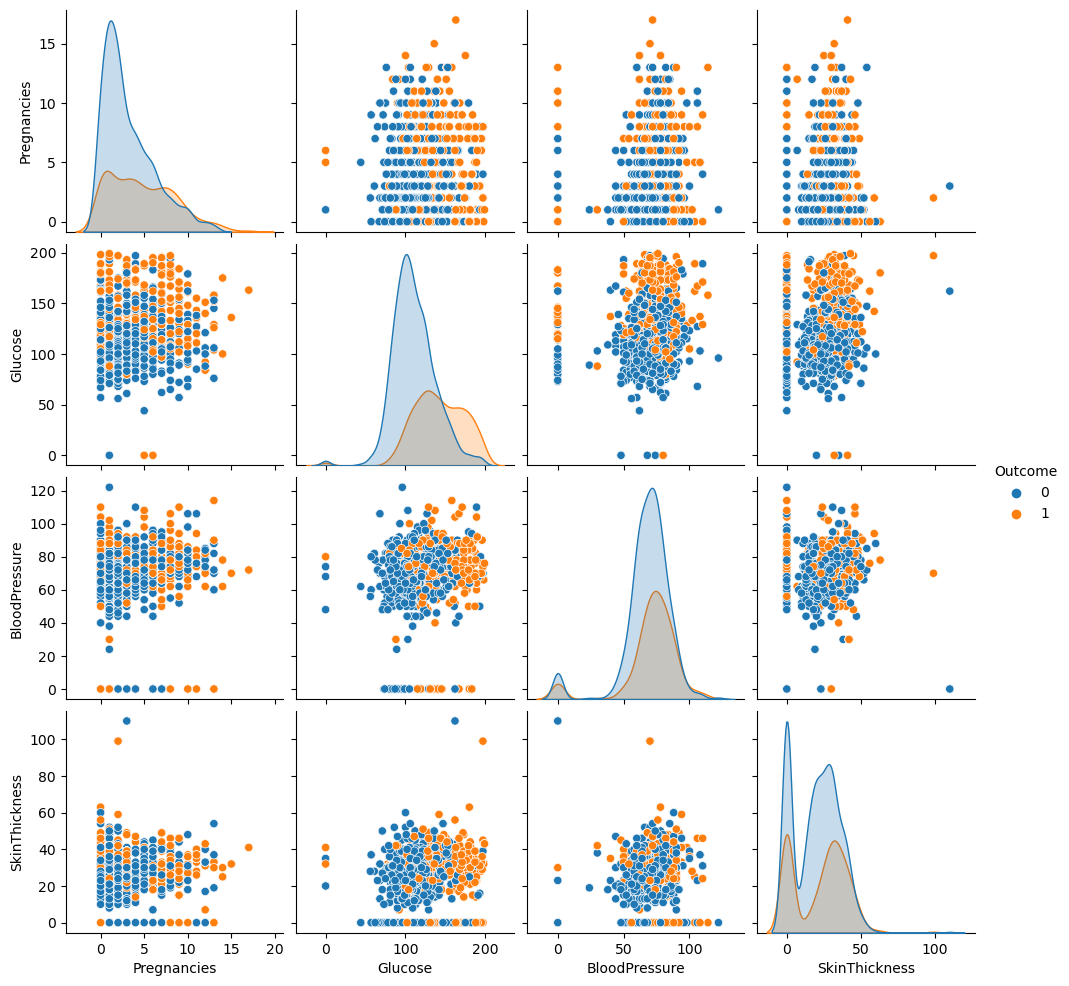

In [11]:
# Visualise distributions of features
sns.pairplot(data, hue='Outcome', vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'])
plt.show()

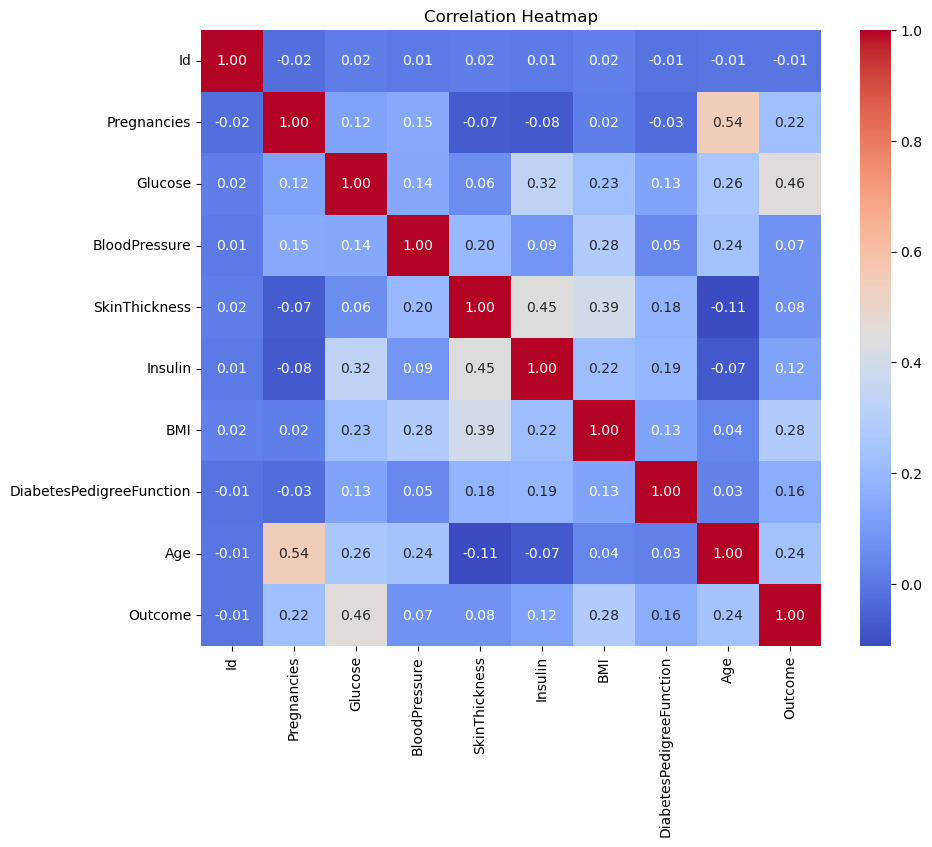

In [12]:
# Correlation analysis
correlation_matrix = data.corr()

# Visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 5 Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict & Calculate
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree Classifier: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy of Decision Tree Classifier: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



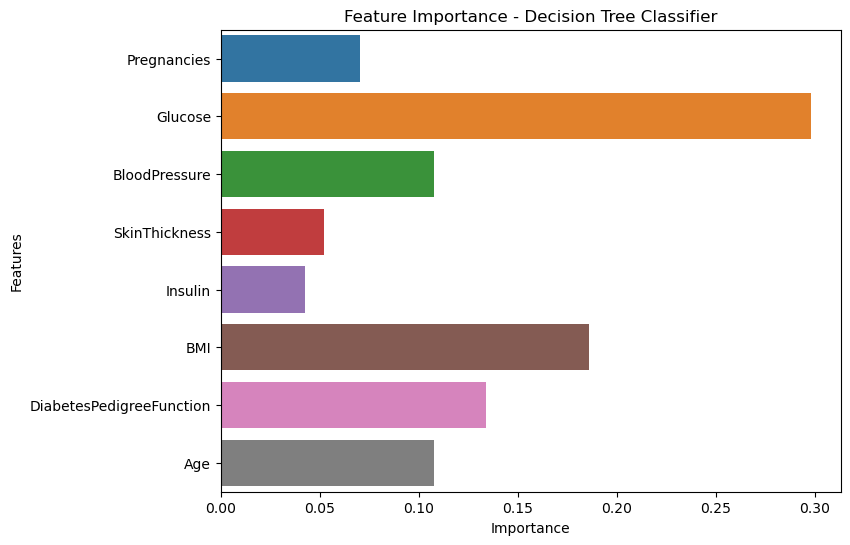

In [14]:
# Feature importance
feature_importance = dt_classifier.feature_importances_

# Visualise feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance - Decision Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()